In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing()
type(housing)

sklearn.utils._bunch.Bunch

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
hp = pd.DataFrame(housing.data, columns=housing.feature_names)

In [7]:
hp.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
hp["Price"] = housing.target

In [9]:
hp.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

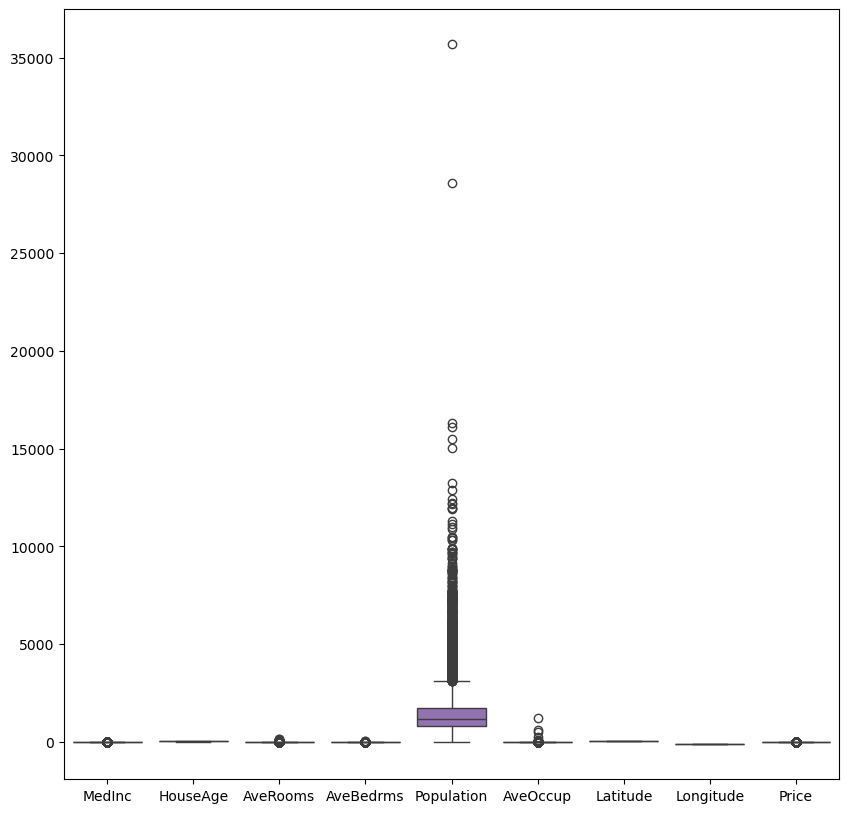

In [10]:
flg, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data = hp, ax = ax)
plt.savefig("boxplot.jpg")

In [11]:
X = hp.iloc[:, :-1]
y = hp.iloc[:, -1]

In [12]:
hp

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [13]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 43)

# Normalization / Standardization

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm  = scaler.transform(X_test)

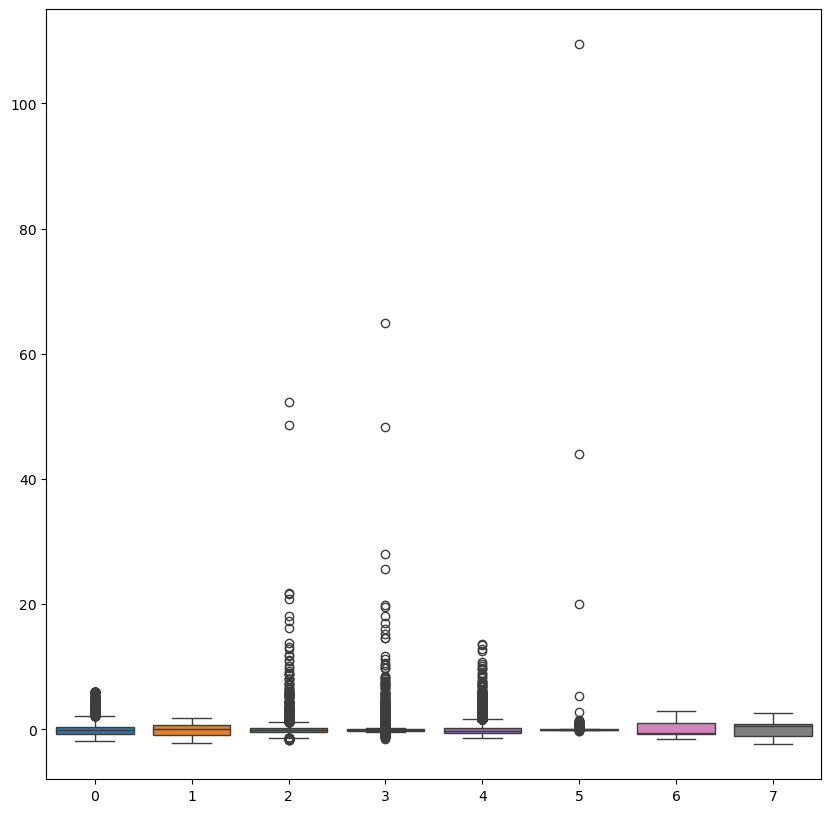

In [17]:
flg, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data = X_train_norm, ax = ax)
plt.savefig("boxplot_trained_data.jpg")

# Model Training

In [19]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_norm, y_train)

LinearRegression()

In [20]:
print(regression.coef_)

[ 0.8034706   0.11313449 -0.22887281  0.27846545 -0.00771768 -0.04098855
 -0.93942707 -0.90526136]


In [21]:
print(regression.intercept_)

2.0695743826135065


In [22]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
11440,6.2984,18.0,6.022801,0.934853,2046.0,3.332248,33.73,-117.97
19986,2.3152,25.0,5.412844,1.055046,1424.0,3.266055,36.21,-119.32
11655,3.9628,29.0,5.862069,1.083072,1724.0,2.702194,33.84,-118.01
14527,3.2151,7.0,3.353846,1.071795,766.0,1.964103,32.92,-117.14
19866,4.5938,18.0,6.153664,1.130024,1158.0,2.737589,36.33,-119.32
...,...,...,...,...,...,...,...,...
18448,5.3157,16.0,6.590551,1.106299,850.0,3.346457,37.23,-121.81
7985,2.5068,26.0,4.240693,1.067394,4066.0,2.609756,33.86,-118.16
18687,3.9340,18.0,5.268156,1.189944,544.0,3.039106,37.03,-121.79
19776,1.8375,21.0,5.372671,1.086957,982.0,3.049689,39.86,-122.23


In [23]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7310,2.4516,36.0,3.606232,1.073654,1398.0,3.960340,33.99,-118.19
4402,2.4677,49.0,3.793855,1.186323,2862.0,2.836472,34.09,-118.28
1929,4.6394,22.0,6.806691,1.018587,813.0,3.022305,38.66,-121.07
11551,3.3438,37.0,4.630037,1.003663,783.0,2.868132,33.75,-117.98
9882,3.0608,22.0,4.750515,1.039863,3794.0,2.607560,36.68,-121.79
...,...,...,...,...,...,...,...,...
16942,3.9688,52.0,4.877593,1.024896,1126.0,2.336100,37.56,-122.31
893,4.6641,29.0,6.011966,1.102564,1724.0,2.947009,37.54,-121.95
11723,3.0100,21.0,10.553648,2.253219,584.0,2.506438,39.25,-120.06
244,2.3906,44.0,4.865574,1.163934,2269.0,3.719672,37.78,-122.22


# Model Prediction

In [25]:
reg_pred = regression.predict(X_test_norm)
reg_pred

array([1.77749703, 1.93671479, 1.52373875, ..., 0.45709074, 1.90857683,
       1.87343893])

In [26]:
# Calculate the error or  the residual
residuals = y_test - reg_pred

In [27]:
residuals

7310    -0.299497
4402     0.255285
1929     0.210261
11551   -0.061247
9882    -0.539054
           ...   
16942    0.843470
893     -0.108924
11723    1.177909
244     -0.791577
19177    0.153561
Name: Price, Length: 6192, dtype: float64

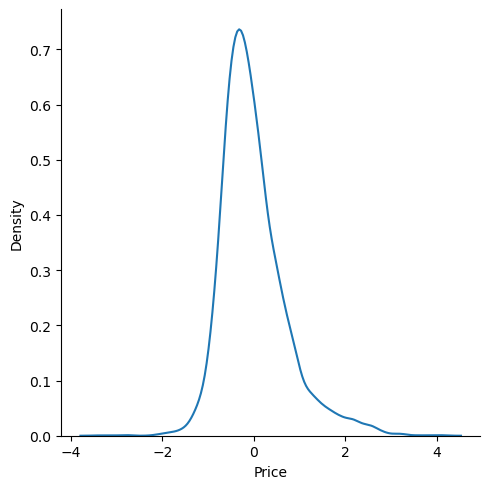

In [28]:
sns.displot(data = residuals, kind="kde")

In [74]:
## lower error value - MSE and MAE
## Higer value - r2 score and adjusted r2 score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(np.sqrt(mean_squared_error(y_test, reg_pred)))
print(mean_absolute_error(y_test, reg_pred))
print(r2_score(y_test, reg_pred))

0.7122199110790784
0.529068224971878
0.6189535823589901


# Save the Model - Pickle

In [31]:
import pickle
pickle.dump(regression, open('model.pk1', 'wb'))

# Load the Model

In [33]:
model = pickle.load(open('model.pk1', 'rb'))

In [34]:
model.predict(X_test_norm)

array([1.77749703, 1.93671479, 1.52373875, ..., 0.45709074, 1.90857683,
       1.87343893])

# Regularization

In [36]:
from sklearn.linear_model import Lasso, Ridge
lasso_regression = Lasso(alpha=1.0)
lasso_regression.fit(X_train_norm, y_train)

ridge_regression = Ridge(alpha=1.0)
ridge_regression.fit(X_train_norm, y_train)

Ridge()

In [68]:
lasso_pred = lasso_regression.predict(X_test_norm)

In [72]:
ridge_pred = ridge_regression.predict(X_test_norm)

In [76]:
print(np.sqrt(mean_squared_error(y_test, reg_pred)))
print(np.sqrt(mean_squared_error(y_test, lasso_pred)))
print(np.sqrt(mean_squared_error(y_test, ridge_pred)))

0.7122199110790784
1.1537907183583103
0.712210151241154
